<a href="https://colab.research.google.com/github/chidambarambaskaran/machinne-learning-projects/blob/main/Spam_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loading Dataset

In [17]:
dataset = pd.read_csv('Spam.csv')
x = dataset['text']
y = dataset['label']

mapping y to Binary values as 0 and 1

In [18]:
y = y.map({'spam':1, 'ham':0})

train test split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

converting the text into numerical values

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)


Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

Prediciting the Test

In [22]:
y_pred = classifier.predict(x_test)

Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:",accuracy)

Accuracy: 1.0


Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[1 0]
 [0 1]]


Visualizing the results

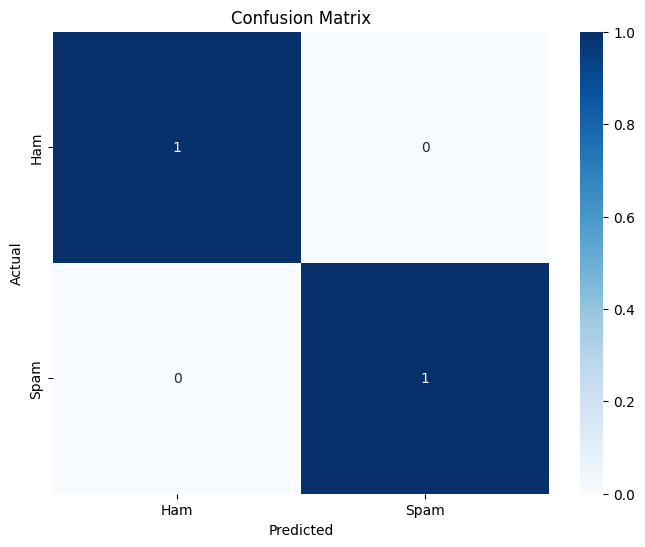

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()